In [1]:
import os
import cv2
import numpy as np
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as pyplot

In [2]:
dataset = 'D:/Training/Pandas/English/Fnt'
classes = sorted(os.listdir(dataset))
# print(classes)

def load_dataset(dataset):
    images = []
    labels = []
    for idx, clas in enumerate(classes):
        classpath = os.path.join(dataset,clas)
        for file_name in os.listdir(classpath):
            filepath = os.path.join(classpath, file_name)
            try:
                image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, (56, 56))
                    image = image.astype('float32') / 255.0
                    images.append(image)
                    labels.append(idx)
            except Exception as e:
                print(f'Error while loading image: {filepath}, Error: {str(e)}')
    
    return np.array(images), np.array(labels)

x, y = load_dataset(dataset)


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 20)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 20)

In [4]:
num_classes = len(classes)
ytrain = to_categorical(ytrain, num_classes=num_classes)
yval = to_categorical(yval, num_classes=num_classes)
ytest = to_categorical(ytest, num_classes=num_classes)

In [5]:
print('Train data : ',xtrain.shape, '\nTest Data : ',xtest.shape, '\nTrain Label : ',ytrain.shape, '\nTest Label : ',ytest.shape,)

Train data :  (31092, 56, 56) 
Test Data :  (9717, 56, 56) 
Train Label :  (31092, 62) 
Test Label :  (9717, 62)


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (56, 56, 1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(xtrain, ytrain, batch_size = batch_size, epochs = epochs, validation_data = (xval, yval))

test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Test Accuracy : ", test_accuracy)

Epoch 1/10
972/972 [==============================] - 59s 60ms/step - loss: 1.0763 - accuracy: 0.6852 - val_loss: 0.2647 - val_accuracy: 0.8894
Epoch 2/10
972/972 [==============================] - 60s 62ms/step - loss: 0.3793 - accuracy: 0.8558 - val_loss: 0.2118 - val_accuracy: 0.9114
Epoch 3/10
972/972 [==============================] - 60s 61ms/step - loss: 0.3084 - accuracy: 0.8759 - val_loss: 0.2005 - val_accuracy: 0.9055
Epoch 4/10
972/972 [==============================] - 59s 61ms/step - loss: 0.2710 - accuracy: 0.8843 - val_loss: 0.1976 - val_accuracy: 0.9143
Epoch 5/10
972/972 [==============================] - 60s 62ms/step - loss: 0.2424 - accuracy: 0.8954 - val_loss: 0.1774 - val_accuracy: 0.9218
Epoch 6/10
972/972 [==============================] - 64s 66ms/step - loss: 0.2300 - accuracy: 0.9014 - val_loss: 0.1737 - val_accuracy: 0.9197
Epoch 7/10
972/972 [==============================] - 67s 69ms/step - loss: 0.2107 - accuracy: 0.9088 - val_loss: 0.1627 - val_accuracy:

In [7]:
model.summary()
model.save('character_recognition_model2.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

c:\Users\AkshayB\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


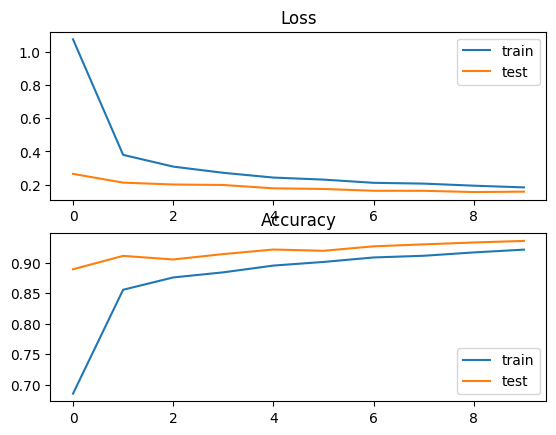

In [8]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
img_path = r'C:\Users\AkshayB\Downloads\img029-00124.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (56,56))
# img = img.astype('float32') / 255.0 
img_final =img.reshape(1,56,56,1)

img_pred = model.predict(img_final)
predicted_img = np.argmax(img_pred)
predicted_char = classes[predicted_img]

1/1 [==============================] - 0s 136ms/step


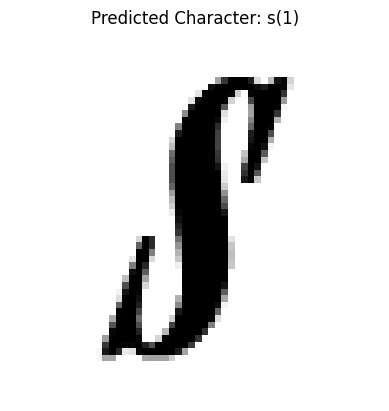

In [10]:
# Display the external image and its predicted character
pyplot.imshow(img.reshape(56, 56), cmap='gray')
pyplot.title(f"Predicted Character: {predicted_char}")
pyplot.axis('off')
pyplot.show()


304/304 [==============================] - 5s 16ms/step


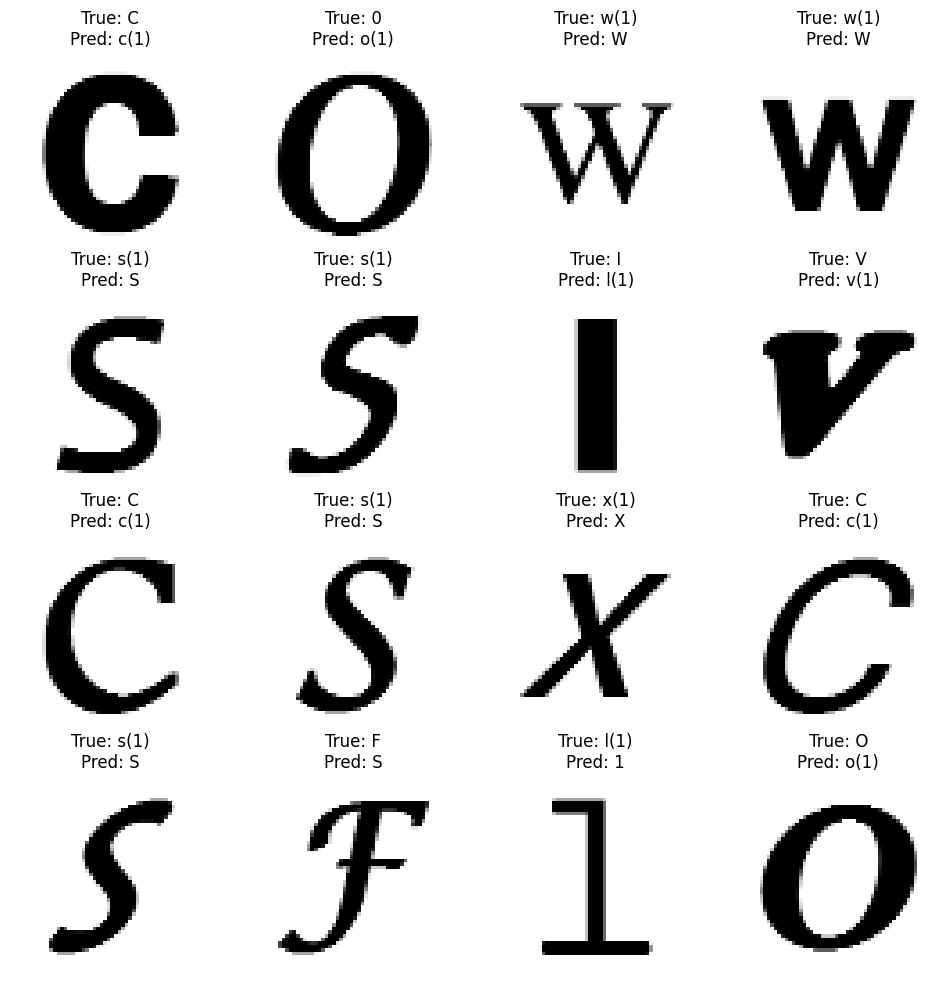

In [11]:
# Preprocess the external test data
x_test = np.array([img_final for img_final in xtest])

false_predictions_indices = []

# Get the indices of false predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(ytest, axis=1)
for i in range(len(x_test)):
    if predicted_labels[i] != true_labels[i]:
        false_predictions_indices.append(i)

# Display the grid of false predictions
num_rows = 4
num_cols = 4
pyplot.figure(figsize=(12, 12))
for i, index in enumerate(false_predictions_indices[:num_rows*num_cols]):
    image_data = x_test[index].reshape(56, 56)
    true_label = classes[true_labels[index]]
    predicted_label = classes[predicted_labels[index]]
    
    pyplot.subplot(num_rows, num_cols, i + 1)
    pyplot.imshow(image_data, cmap='gray')
    pyplot.title(f"True: {true_label}\nPred: {predicted_label}")
    pyplot.axis('off')

# pyplot.tight_layout()
pyplot.show()

# Load the external test data (replace with your external test data)
# external_x_test = np.load("/path/to/external/test/data.npy")
# external_y_test = np.load("/path/to/external/test/labels.npy")


In [12]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix

array([[141,   0,   0, ...,   0,   0,   0],
       [  0, 141,   0, ...,   0,   0,   0],
       [  0,   0, 156, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 103,   0,   0],
       [  0,   0,   0, ...,   0, 122,   0],
       [  0,   0,   0, ...,   0,   0, 116]], dtype=int64)

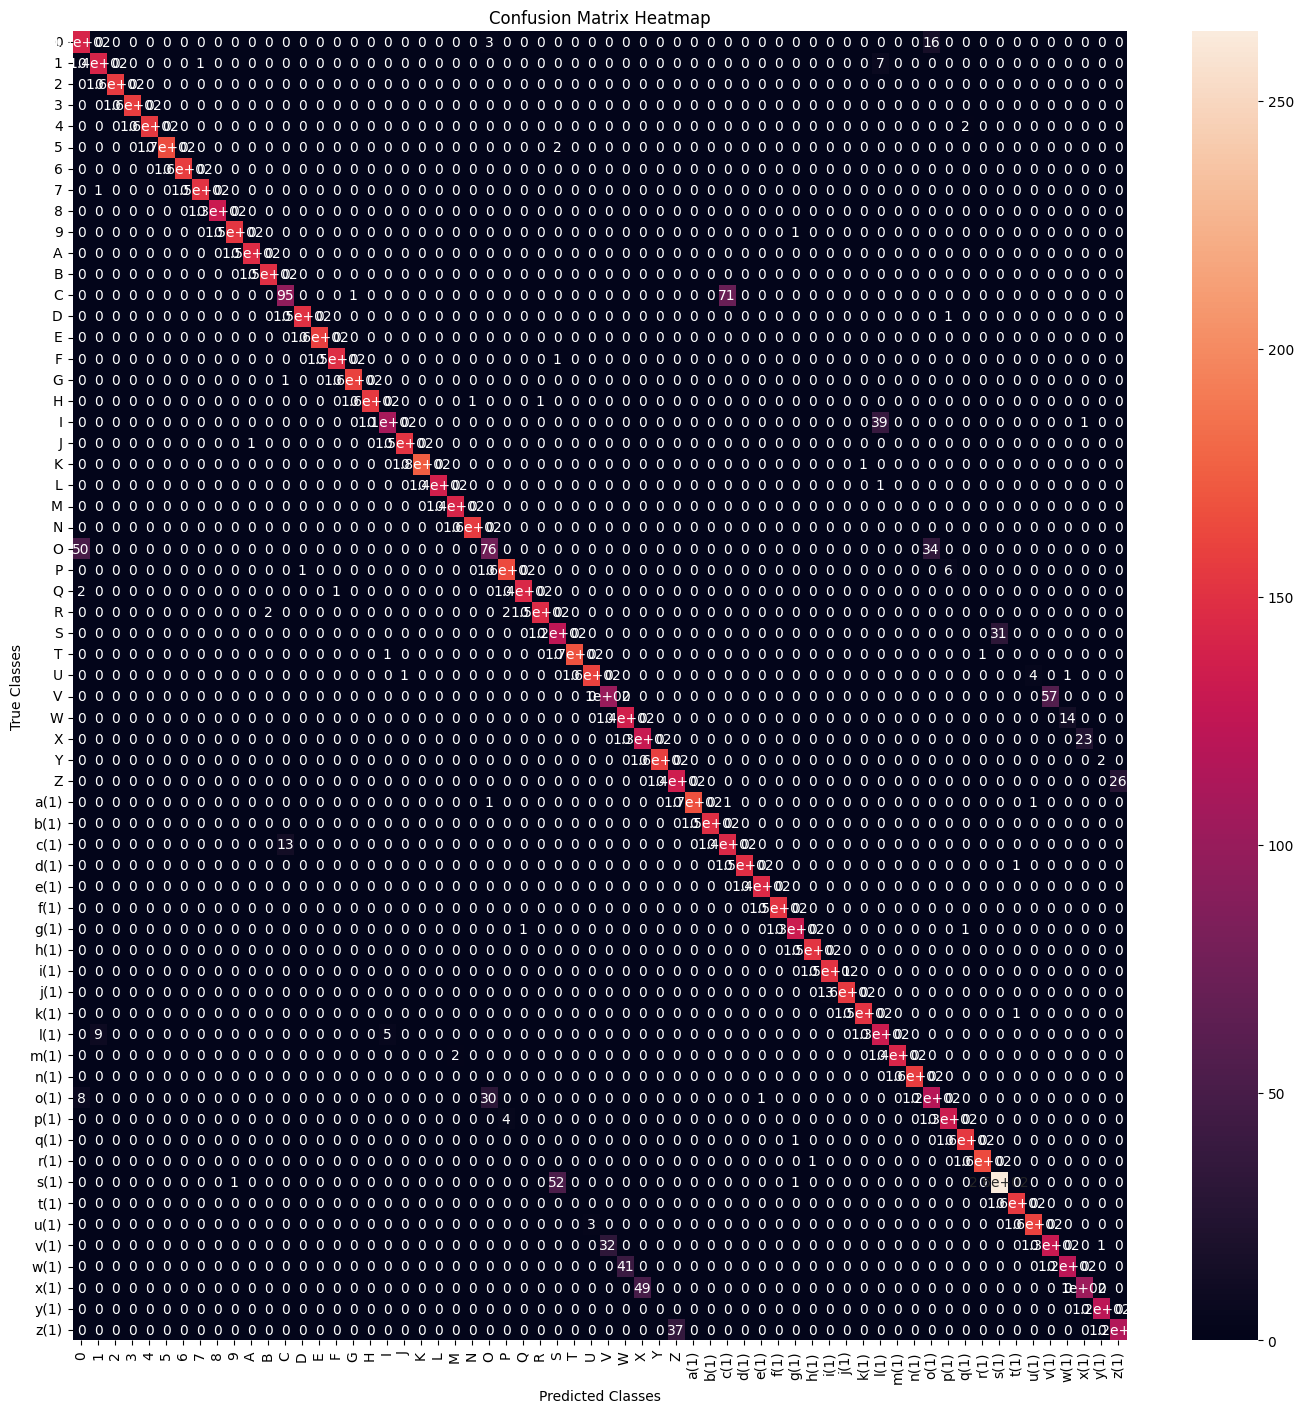

In [13]:
pyplot.figure(figsize=(17, 17))
sns.heatmap(conf_matrix, annot=True, xticklabels=classes, yticklabels=classes)
pyplot.xlabel('Predicted Classes')
pyplot.ylabel('True Classes')
pyplot.title('Confusion Matrix Heatmap')
pyplot.show()